<a href="https://colab.research.google.com/github/zinebelouardi/RNN_LSTM_GRU/blob/main/RNN%2C_LSTM_et_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1>RNN & LSTM & GRU par la pratique</h1></center>
Pour regarder la vidéo du support de cours:

[RNN & LSTM & GRU par la pratique
](https://youtu.be/ZG1XtRwtEes)

<H1> Plan </H1>

1.   Introduction
2.   Chargement des données
3.   Modèles RNN, LSTM et GRU
<ul>
<li> RNN </li>
    <ul>
    <li>Dèfinition</li>  
    <li>Entrainement</li>  
    <li>Evaluation</li>
    </ul>
<li> LSTM </li>
    <ul>
    <li>Dèfinition</li>  
    <li>Entrainement</li>  
    <li>Evaluation</li>
    </ul>
<li> GRU </li>
    <ul>
    <li>Dèfinition</li>  
    <li>Entrainement</li>  
    <li>Evaluation</li>
    </ul>
</ul>
4.   Etude comparative
5.   Conclusion




---



<h1>Introduction</h1>
Les réseaux de neurones récurrents (RNN: Reccurent Neural Network) est un type de réseau de neurones artificiels doté d’une mémoire pour se rappeler des informations.

Cette mémoire est représentée sous forme de connexions récurrentes entre les neurones ou unités de neurones. Ces connexions peuvent former un cycle récurrent, d’où le terme « récurrent » dans RNN. Ils sont utilisés pour le cas des données séquentielles ou on as besoin des informations sur les états précédents.

Les RNN présentent certaines limitations:
 Vanishing et Exploding Gradient Exemple:
*   Mémoire à long terme
*   Vanishing Gradient
*   Exploding Gradient

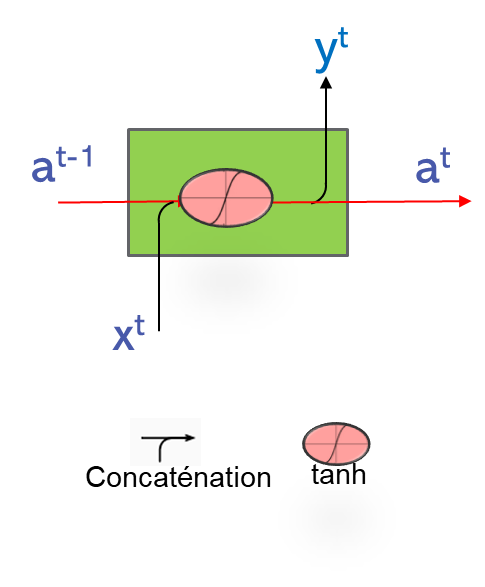



Pour résoudre ces problèmes les LSTM pour Long Short-Term Memory ont été proposé en 1997. Les LSTM sont une variante des réseaux de neurones récurrents (RNN)

Les LSTM ont introduit une nouvelle structure de réseau avec des cellules de mémoire et des mécanismes de portes pour contrôler le flux d'information de manière adaptative.

Nous avons en entrée en plus des deux entrées comme pour les RNN, la cellule de mémoire et de même chose en sortie Nous avons 3 portes; d’oubli, d’entrée et de sorite La mémoire à long terme est sauvegardée dans les cellules de mémoire et la mémoire à court terme est sauvegardée dans l’état cachée.
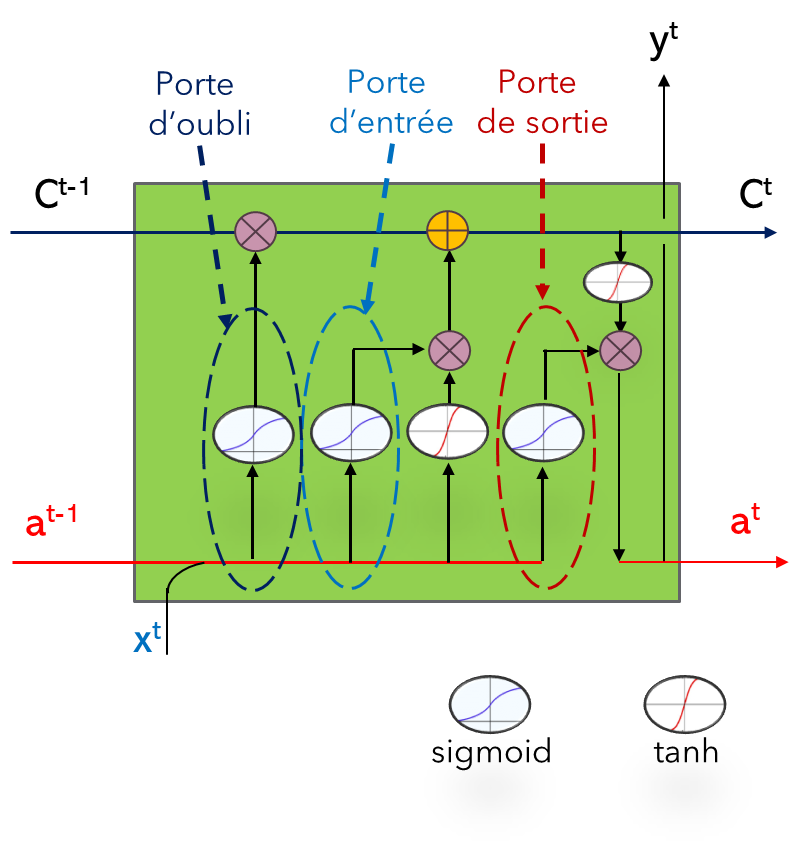

L’utilisation de la cellule de mémoire et des portes dans les LSTM ont multiplié la complexité de calcul par 4. du fait que le nombre de Paramètres d’une cellule LSTM est égal à 4 * le nombre de Paramètres d’une cellule RNN.

Les GRU pour Gated Recurrent Units ont été introduits Par Kyunghyun Cho et al. en 2014. Ils ont été développés pour simplifier la complexité des Long Short-Term Memory (LSTM) tout en offrant des performances comparables pour la modélisation des séquences à long terme.

Les GRU sont composés de deux portes principales Ce qui les rend plus simples que les LSTM qui ont trois portes :
1.   a porte de mise à jour (update gate)
2.   la porte de réinitialisation (reset gate)

La porte de mise à jour décide de la quantité d'information à transférer vers l'état suivant, Et la porte de réinitialisation qui détermine la quantité d'information passée des états précédents à l'état actuel.

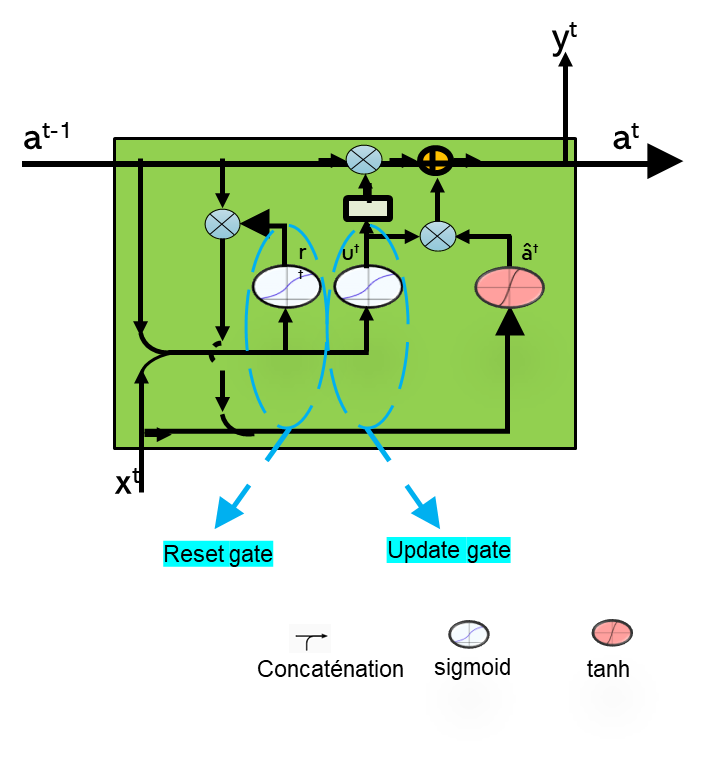

<H1> Implémentation </h1>
<H2> Dataset </h1>
Le dataset "yfinance" est un ensemble de données financières téléchargées à partir de Yahoo Finance.

Ce dataset contient diverses informations boursières telles que les prix d'ouverture, de fermeture, les prix hauts et bas, le volume des transactions, et les ajustements des prix.

Pour notre exemple, nous allons télécharger les données de l'action Apple Inc. (AAPL).

Exemple de Description du Dataset pour Apple Inc. (AAPL):

*   Ticker: AAPL (Apple Inc.)
*   Période de téléchargement: 1er janvier 2010 au 1er janvier 2023
*   Fréquence: Quotidienne

Colonnes du Dataset:

*   Date: La date de l'enregistrement des données.
*   Open: Le prix d'ouverture de l'action pour la journée donnée.
*   High: Le prix le plus haut atteint par l'action pendant la journée.
*   Low: Le prix le plus bas atteint par l'action pendant la journée.
*   Close: Le prix de clôture de l'action pour la journée donnée.
*   Adj Close: Le prix de clôture ajusté pour les dividendes et les fractionnements d'actions.
*   Volume: Le nombre total d'actions échangées pendant la journée.

/tmp/ipython-input-2520191458.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2010-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


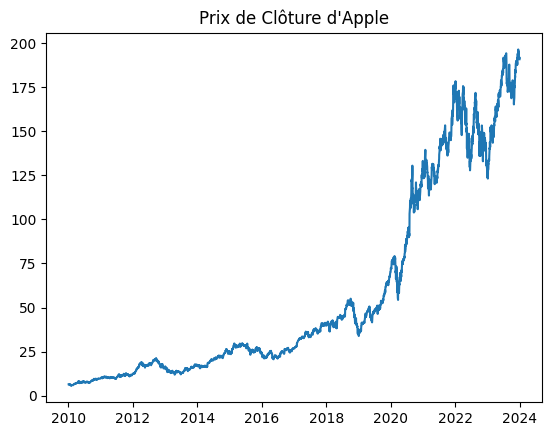

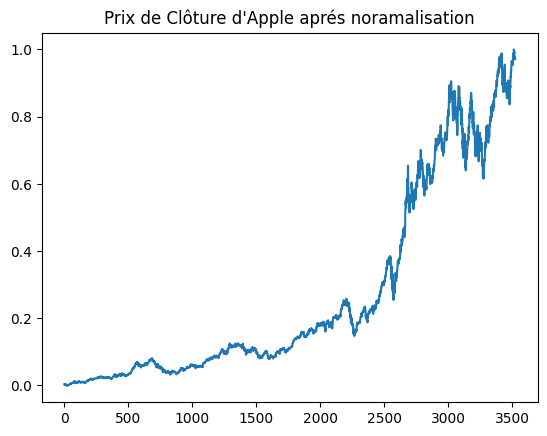

In [ ]:
import yfinance as yf
# Charger les données
ticker = 'AAPL'  # Par exemple, les données de l'action Apple
data = yf.download(ticker, start='2010-01-01', end='2023-12-31')


# Visualisation des données
import matplotlib.pyplot as plt
plt.plot(data['Close'])
plt.title('Prix de Clôture d\'Apple')
plt.show()

# Normalisation des données
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

plt.plot(scaled_data)
plt.title('Prix de Clôture d\'Apple aprés noramalisation')
plt.show()

# Création des séquences
import numpy as np
import pandas as pd
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Division en ensembles d'entraînement et de test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

<H2> Modèles RNN, LSTM et GRU </h2>
Après la préparation des données, nous allons passer maintenant à la définition de nos modèles RNN, LSTM et GRU.

<H2> RNN </H2>

Commençons par implémenter un RNN simple. Nous allons définir l'architecture du modèle, l'entraîner et évaluer ses performances.


In [ ]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input

# Définition du modèle RNN
model_rnn = Sequential([
    Input(shape=(seq_length, 1)),   # définition de la forme des données en entrée
    SimpleRNN(units=50, activation='tanh'),  # Couche SimpleRNN avec 50 unités
    Dense(1, activation='sigmoid')  # Couche Dense avec 1 neurone en sortie
])

In [ ]:
# Affichage du résumé du modèle
model_rnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilation du modèle
model_rnn.compile(optimizer='adam', loss='mse')

In [ ]:
# Entraînement du modèle
history_rnn = model_rnn.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0392 - val_loss: 0.0038
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.9233e-04 - val_loss: 0.0030
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.4218e-04 - val_loss: 0.0025
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4774e-04 - val_loss: 0.0023
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.3774e-04 - val_loss: 0.0021
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.4918e-04 - val_loss: 0.0024
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0888e-04 - val_loss: 0.0022
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9962e-04 - val_loss: 0.0026
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.4252e-04 - val_loss: 0.0029
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.4507e-04 - val_loss: 0.0031
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.2512e-04 - val_loss: 0.0029
Epoch 12/20
87/87 ━━━━━

<h2> Evaluation du modèle</h2>
Nous allons visualiser et afficher les courbes de précision et de perte pour l'entraînement et la validation de votre modèle.

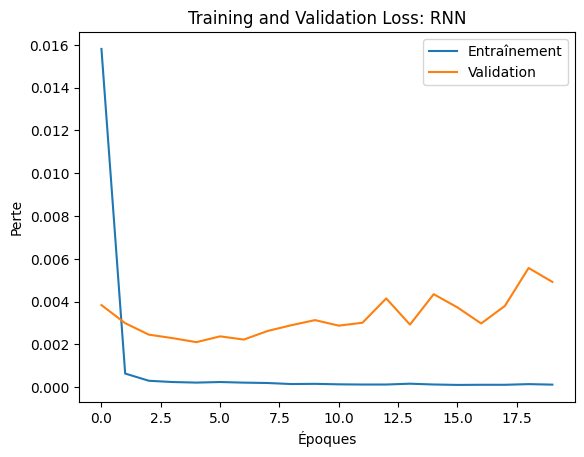

In [ ]:
import matplotlib.pyplot as plt

# Tracer l'historique de l'entraînement
plt.plot(history_rnn.history['loss'], label='Entraînement')
plt.plot(history_rnn.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: RNN')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

Les deux courbes montrent une diminution rapide au début, ce qui indique que le modèle apprend efficacement au début de l'entraînement.

La perte de validation diminue initialement, mais montre plus de fluctuations par rapport à la perte d'entraînement. Ces fluctuations indiquent que la performance du modèle sur l'ensemble de validation est moins stable. cela suggère que le modèle peut surapprendre sur les données d'entraînement.


Du fait que nous avons utilisé des séquences longues, on remarque bien l’apparition du problème de vanishing gradient dont souffrent les RNN.

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026
RNN Test Loss: 0.004919138271361589
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


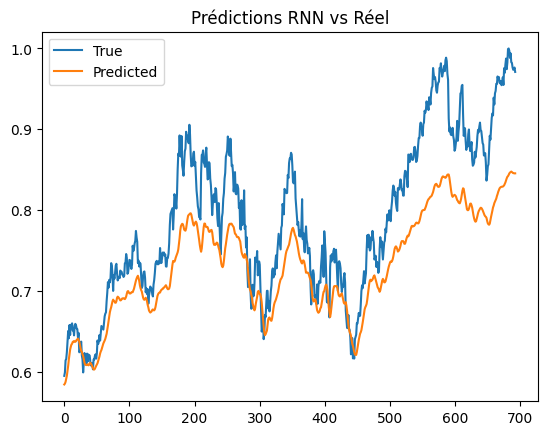

In [ ]:
# Évaluation du modèle
loss_rnn = model_rnn.evaluate(X_test, y_test)
print(f"RNN Test Loss: {loss_rnn}")

# Prédictions
predictions_rnn = model_rnn.predict(X_test)
plt.plot(y_test, label='True')
plt.plot(predictions_rnn, label='Predicted')
plt.legend()
plt.title('Prédictions RNN vs Réel')
plt.show()

Dans l'exemple précédant, nous avons utilisé une seule cellule RNN.
Par la suite, nous allons ajouter une deuxième cellule RNN après la première et voir le comportement de notre modèle.

Pour pouvoir empiler deux cellules RNN l'une après l'autre, il faut utiliser l'argument return_sequences=True pour permettre à la deuxième cellule RNN de traiter la sortie de la cellule précédente.

In [ ]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Définition du modèle RNN
model_rnn2 = Sequential([
    SimpleRNN(units=50, activation='tanh', input_shape=(seq_length, 1), return_sequences=True), # 1ère Couche SimpleRNN avec 50 unités
    SimpleRNN(units=20, activation='tanh', input_shape=(seq_length, 50)), # 2iéme Couche SimpleRNN avec 50 unités
    Dense(1, activation='sigmoid')  # Couche Dense avec 1 neurone en sortie
])

# Affichage du résumé du modèle
model_rnn2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 20)             │         1,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,041 (15.79 KB)

 Trainable params: 4,041 (15.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilation du modèle
model_rnn2.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
history_rnn2 = model_rnn2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0215 - val_loss: 0.0153
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3270e-04 - val_loss: 0.0097
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.7455e-04 - val_loss: 0.0105
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 1.6385e-04 - val_loss: 0.0104
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 1.9689e-04 - val_loss: 0.0108
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 1.9026e-04 - val_loss: 0.0086
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.9517e-04 - val_loss: 0.0083
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 1.6082e-04 - val_loss: 0.0069
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 1.4985e-04 - val_loss: 0.0095
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 9.7292e-05 - val_loss: 0.0072
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.0547e-04 - val_loss: 0.0070
Epoch 12/20
87/87 ━━━━━

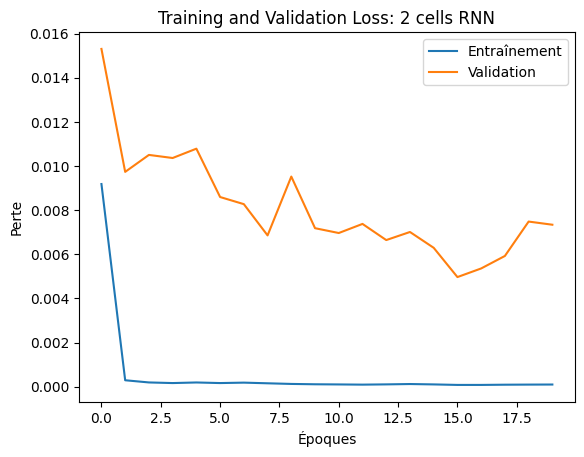

In [ ]:
import matplotlib.pyplot as plt

# Tracer l'historique de l'entraînement
plt.plot(history_rnn2.history['loss'], label='Entraînement')
plt.plot(history_rnn2.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: 2 cells RNN')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

<H2> LSTM </H2>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Définition du modèle LSTM avec différentes fonctions d'activation
model_lstm = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_length, 1)),  # Utilisation de la fonction d'activation tanh
    Dense(1, activation='sigmoid')  # Utilisation de la fonction d'activation sigmoid pour la sortie
])

model_lstm.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilation du modèle
model_lstm.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
history_lstm = model_lstm.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0816 - val_loss: 0.3082
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0068 - val_loss: 0.0310
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.2429e-04 - val_loss: 0.0239
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2406e-04 - val_loss: 0.0262
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 1.9187e-04 - val_loss: 0.0207
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 1.8258e-04 - val_loss: 0.0224
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 1.9951e-04 - val_loss: 0.0210
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.0598e-04 - val_loss: 0.0211
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.6224e-04 - val_loss: 0.0185
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 1.7108e-04 - val_loss: 0.0164
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 1.3859e-04 - val_loss: 0.0174
Epoch 12/20
87/87 ━━━━━━━━━

<h2> Evaluation du modèle</h2>
Nous allons visualiser et afficher les courbes de précision et de perte pour l'entraînement et la validation de notre modèle.

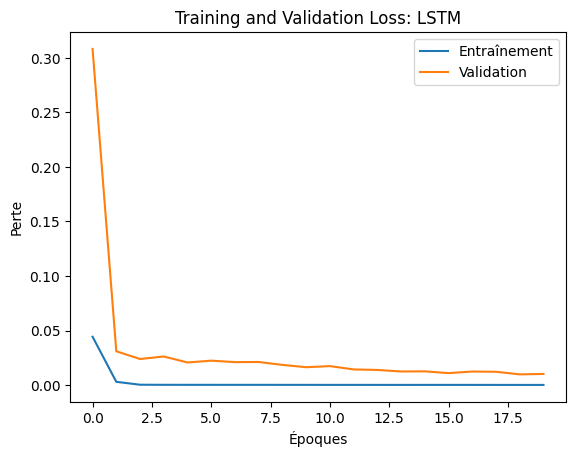

In [ ]:
import matplotlib.pyplot as plt

# Tracer l'historique de l'entraînement
plt.plot(history_lstm.history['loss'], label='Entraînement')
plt.plot(history_lstm.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: LSTM')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

Par la suite, nous allons utiliser deux cellules LSTM comme pour le cas de RNN.

In [ ]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Définition du modèle LSTM avec deux cellules
model_lstm2 = Sequential([
    LSTM(units=50, activation='tanh', input_shape=(seq_length, 1), return_sequences=True), # 1ère Couche SimpleRNN avec 50 unités
    LSTM(units=20, activation='tanh', input_shape=(seq_length, 50)), # 2iéme Couche SimpleRNN avec 50 unités
    Dense(1, activation='sigmoid')  # Couche Dense avec 1 neurone en sortie
])

# Affichage du résumé du modèle
model_lstm2.summary()

# Compilation du modèle
model_lstm2.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
history_lstm2 = model_lstm2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 20)             │         5,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,101 (62.89 KB)

 Trainable params: 16,101 (62.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0691 - val_loss: 0.2961
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0131 - val_loss: 0.0617
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 6.8286e-04 - val_loss: 0.0368
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 3.3868e-04 - val_loss: 0.0348
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 3.3389e-04 - val_loss: 0.0309
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 2.5308e-04 - val_loss: 0.0279
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 2.1919e-04 - val_loss: 0.0296
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 2.2620e-04 - val_loss: 0.0271
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 1.9805e-04 - val_loss: 0.0247
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 2.2880e-04 - val_loss: 0.0272
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 1.9630e-04 - val_loss: 0.0229
Epoch 12/20
87/87 ━━━━━━━━━

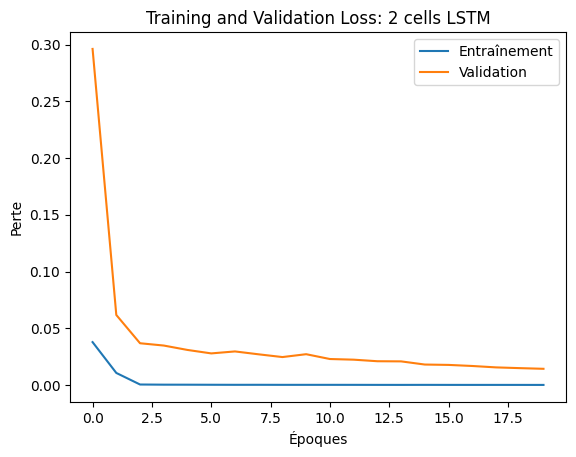

In [ ]:
import matplotlib.pyplot as plt

# Tracer l'historique de l'entraînement
plt.plot(history_lstm2.history['loss'], label='Entraînement')
plt.plot(history_lstm2.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: 2 cells LSTM')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

<H2> GRU</h2>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Définition du modèle GRU
model_gru = Sequential([
    GRU(50, activation='tanh', input_shape=(60, 1)),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Affichage du résumé du modèle
model_gru.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilation du modèle
model_gru.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
history_gru = model_gru.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0878 - val_loss: 0.3167
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0098 - val_loss: 0.0122
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 3.2559e-04 - val_loss: 0.0153
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 2.4480e-04 - val_loss: 0.0149
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 2.2797e-04 - val_loss: 0.0135
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 2.1067e-04 - val_loss: 0.0136
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 1.9590e-04 - val_loss: 0.0129
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 1.7305e-04 - val_loss: 0.0127
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 1.5628e-04 - val_loss: 0.0111
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 1.4957e-04 - val_loss: 0.0110
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 1.3250e-04 - val_loss: 0.0106
Epoch 12/20
87/87 ━━━━━━━━━

<h2> Evaluation du modèle</h2>
Nous allons visualiser et afficher les courbes de précision et de perte pour l'entraînement et la validation de votre modèle.


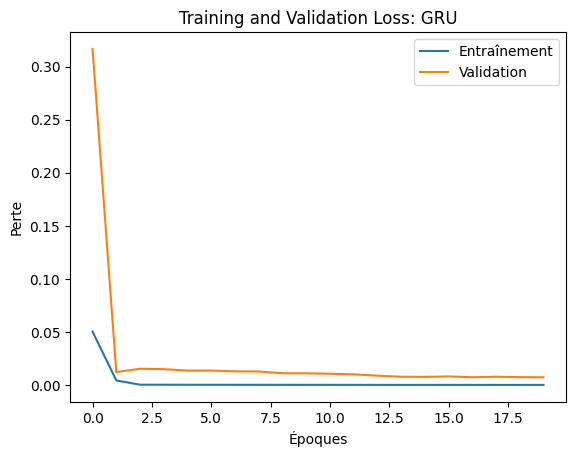

In [ ]:
import matplotlib.pyplot as plt

# Tracer l'historique de l'entraînement
plt.plot(history_gru.history['loss'], label='Entraînement')
plt.plot(history_gru.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: GRU')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()


Nous allons tester aussi deux cellules GRU

In [ ]:
# Définition du modèle avec deux cellules GRU
model_gru2 = Sequential([
    GRU(units=50, activation='tanh', input_shape=(60, 1), return_sequences=True), # 1ère Couche SimpleRNN avec 50 unités
    GRU(units=50, activation='tanh', input_shape=(seq_length, 50)), # 2iéme Couche SimpleRNN avec 50 unités
    Dense(1, activation='sigmoid')
])
# Compilation du modèle
model_gru2.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
history_gru2 = model_gru2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - loss: 0.0624 - val_loss: 0.0022
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 9.9954e-04 - val_loss: 0.0060
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 3.1229e-04 - val_loss: 0.0159
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 1.7858e-04 - val_loss: 0.0141
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 1.4077e-04 - val_loss: 0.0111
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 1.2853e-04 - val_loss: 0.0125
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 9.9821e-05 - val_loss: 0.0113
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 8.3498e-05 - val_loss: 0.0079
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - loss: 8.4939e-05 - val_loss: 0.0076
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 7.0715e-05 - val_loss: 0.0089
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 8.3938e-05 - val_loss: 0.0079
Epoch 12/20
87/87 ━━

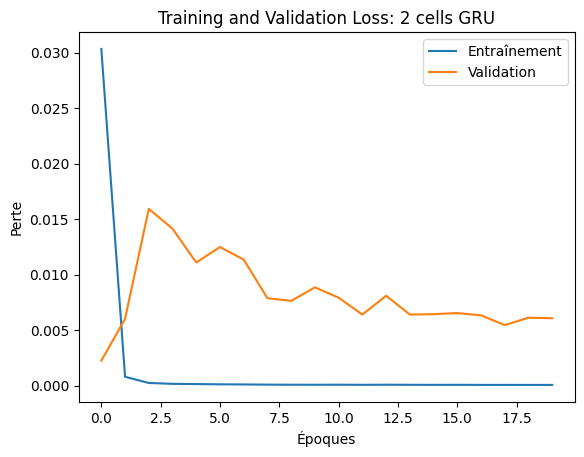

In [ ]:
import matplotlib.pyplot as plt

# Tracer l'historique de l'entraînement
plt.plot(history_gru2.history['loss'], label='Entraînement')
plt.plot(history_gru2.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: 2 cells GRU')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

<H1> Etude comparative</H1>

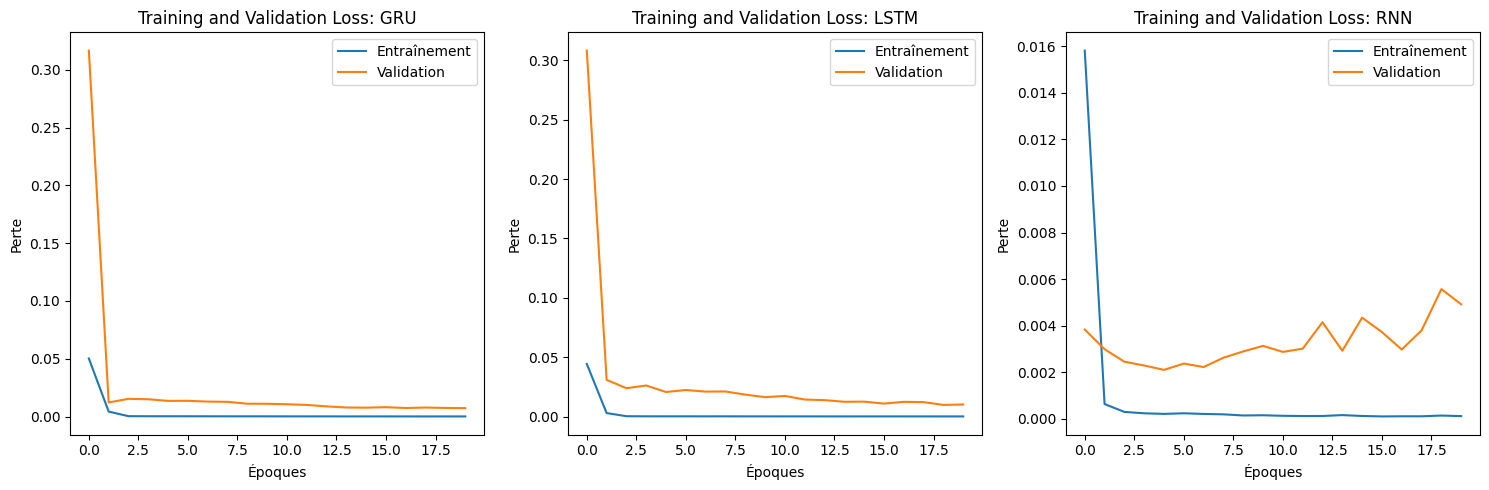

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

# Sous-graphe 1 : Perte pour GRU
plt.subplot(1, 3, 1)
# Tracer l'historique de l'entraînement
plt.plot(history_gru.history['loss'], label='Entraînement')
plt.plot(history_gru.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: GRU')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()


# Sous-graphe 2 : Perte pour LSTM
plt.subplot(1, 3, 2)
# Tracer l'historique de l'entraînement
plt.plot(history_lstm.history['loss'], label='Entraînement')
plt.plot(history_lstm.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: LSTM')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()


# Sous-graphe 2 : Perte pour RNN
plt.subplot(1, 3, 3)
# Tracer l'historique de l'entraînement
plt.plot(history_rnn.history['loss'], label='Entraînement')
plt.plot(history_rnn.history['val_loss'], label='Validation')
plt.title('Training and Validation Loss: RNN')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Ajuster l'espace entre les sous-graphes
plt.tight_layout()

# Afficher le graphique
plt.show()




En comparant les 3 modèles, on peut constater que les GRU et LSTM performent très bien que les RNN.

 Mais en termes de complexité, le modèle à base de GRU présente un très bon compromis. Il présente un excellent comportement pareil que celui du modèle LSTM et bien meilleur que le modèle RNN mais avec moins de paramètres que le modèle à base des LSTM. En effet, les paramètres de chaque modèle sont comme suit:

1.   GRU: 7950 paramètres
2.   LSTM: 10400 paramètres
3.   RNN: 2600 paramètres



In [ ]:
!pip install pydot graphviz

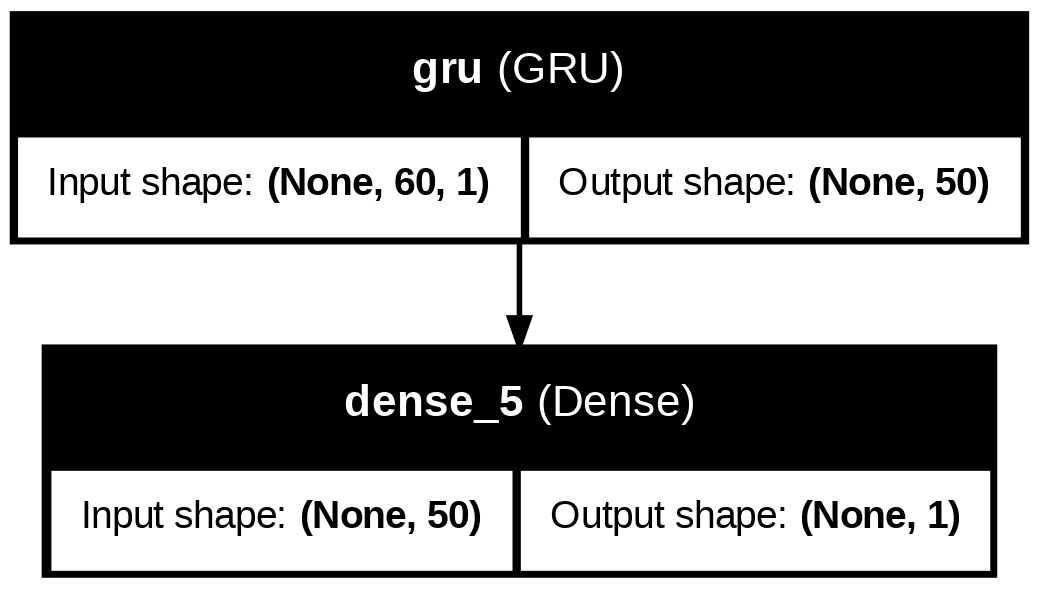

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_gru, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

